## Playstore App Review Analysis

The Google Play Store has become a go-to platform for downloading apps from various categories. With millions of apps available, it serves as a central hub for smartphone users. In this project, we will analyze over ten thousand apps and reviews across different categories to gather insights that will help us devise strategies for driving growth and retention.

The datasetconsists of two files:

*   Play Store Data.csv : This dataset contains all the details of the applications on Google Play Store. There are 13 features for each app.
*   User Reviews.csv : It contains reviews for each app along with Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.



## Importing Necessary Data and Modules

In [1]:
# Import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
os.listdir()

['.ipynb_checkpoints',
 'Play Store Data.csv',
 'Play_Store_App_Review_Analysis_Capstone_Project.ipynb',
 'User Reviews.csv']

In [2]:
# Read in the dataset
data = pd.read_csv('Play Store Data.csv')

# Print the summary of the dataframe
print(data.info())

# Print the total number of apps
print('Total number of apps in the dataset = ', len(data))

# Have a look at a random sample of the dataframe
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
Total number of apps in the dataset =  10841


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3571,SugarSync,PRODUCTIVITY,4.1,16420,3.8M,"1,000,000+",Free,0,Everyone,Productivity,"May 16, 2018",4.4.0.4,2.3.3 and up
5121,Platincoin Wallet - PLC Group AG,LIBRARIES_AND_DEMO,4.3,375,15M,"10,000+",Free,0,Everyone,Libraries & Demo,"June 1, 2018",2.0.1,4.0.3 and up
7169,CD Carpe Diem App,FAMILY,NaN,17,27M,100+,Free,0,Everyone,Education,"July 18, 2018",2,4.1 and up
596,"Meet4U - Chat, Love, Singles!",DATING,4.2,40039,6.5M,"1,000,000+",Free,0,Mature 17+,Dating,"July 27, 2018",1.31.3,4.0.3 and up
6026,BD All Results,FAMILY,4.1,205,7.3M,"50,000+",Free,0,Everyone,Education,"November 29, 2017",9.0,4.0.3 and up
1779,PLANK!,GAME,4.7,7196,38M,"500,000+",Free,0,Everyone,Arcade,"July 17, 2018",1.0.2,4.3 and up
1774,Bricks n Balls,GAME,4.4,30253,Varies with device,"1,000,000+",Free,0,Everyone,Casual,"August 5, 2018",1.0.1.049,4.1 and up
3799,AC - Tips & News for Android™,NEWS_AND_MAGAZINES,4.2,23292,14M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"May 24, 2018",3.1.12,4.1 and up
3697,video player,VIDEO_PLAYERS,4.4,26421,Varies with device,"1,000,000+",Free,0,Everyone,Video Players & Editors,"May 30, 2018",3.4.5,4.1 and up
10421,HD Jigsaw Volvo FH Trucks,FAMILY,NaN,2,7.6M,500+,Free,0,Teen,Puzzle,"November 29, 2016",1.0,4.0 and up


## Exploratory Data Analysis and Visualizations

In [3]:
# Drop NaNs and duplicates in the dataframe
apps = data.dropna()
apps = apps.drop_duplicates()
print(len(apps))

# Remove unwanted characters
chars = ['$', '+', ',']
cols = ['Installs','Price']

for col in cols:
  for char in chars:
    apps[col] = apps[col].astype(str).str.replace(char,'')

  # Convert columns back to numeric data type
  apps[col] = pd.to_numeric(apps[col])

# Standardize the size of Apps to MB
apps['Size'] = apps['Size'].astype(str).str.replace('M','')
apps['Size'] = apps['Size'].astype(str).str.replace('k','e-3')

# Change the size 'Varies with device' to average app size as reported by Google
apps['Size'] = apps['Size'].astype(str).str.replace('Varies with device','11.5')

apps['Size'] = pd.to_numeric(apps['Size'])

8886


C:\Users\saura\AppData\Local\Temp\ipykernel_12984\4203521474.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  apps[col] = apps[col].astype(str).str.replace(char,'')


In [4]:
# Convert the 'Last Updated' column to Datetime object
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])

apps.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7242,CF Appreciation,LIFESTYLE,2.0,11,6.2,1000,Free,0.0,Everyone,Lifestyle,2018-06-12,2.4.78-s,4.1 and up
7698,CP Trivia,GAME,5.0,5,12.0,100,Free,0.0,Everyone,Trivia,2018-08-06,0.99,5.0 and up
5595,Choices: Stories You Play,FAMILY,4.6,807155,93.0,10000000,Free,0.0,Teen,Simulation,2018-07-30,2.3.5,4.0.3 and up
4904,Smart-AC Universal Remote Free,FAMILY,1.8,3270,1.8,500000,Free,0.0,Everyone,Entertainment,2015-08-18,1.0,2.2 and up
8983,News: DW Español,NEWS_AND_MAGAZINES,4.3,25,6.3,1000,Free,0.0,Everyone,News & Magazines,2018-04-26,1.0,4.1 and up
2185,Tee and Mo Bath Time Free,FAMILY,3.6,418,97.0,100000,Free,0.0,Everyone,Educational;Education,2016-11-07,1.0.3,4.0.3 and up
7518,Leica CL,PHOTOGRAPHY,2.6,8,2.4,1000,Free,0.0,Everyone,Photography,2017-11-21,1.0,4.1 and up
7109,CB Outdoors,FAMILY,3.8,5,12.0,1000,Free,0.0,Everyone,Education,2017-05-30,1.200,4.0.3 and up
5871,AZ Lottery Players Club,FAMILY,4.2,97,8.9,10000,Free,0.0,Everyone,Entertainment,2018-07-09,2.0.0(9),4.0.3 and up
8617,Destiny Ninja Shall we date otome games love s...,GAME,4.4,13079,30.0,500000,Free,0.0,Everyone 10+,Adventure,2018-04-20,1.6.2,4.0 and up


##Data Exploration and Visualization

In [5]:
# Print the unique app categories
categories = apps['Category'].unique()
print(categories)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


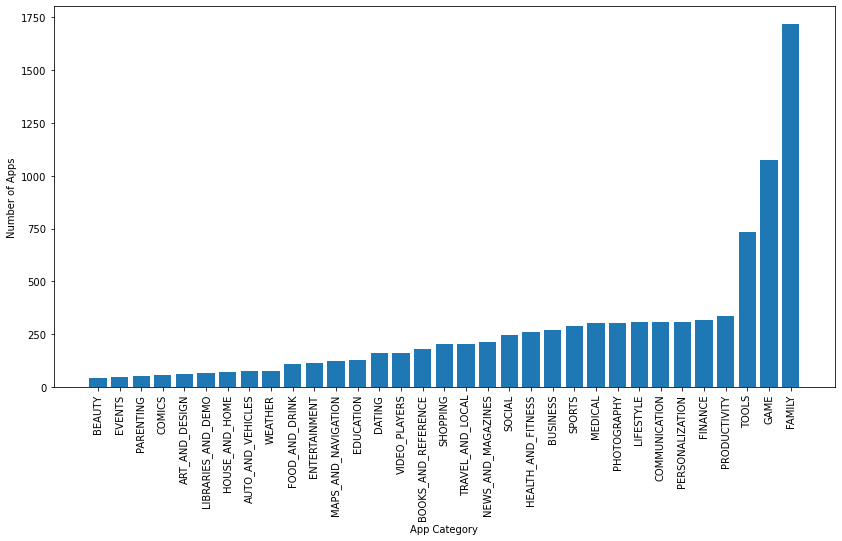

In [6]:
# Plot App category and the total number of apps which fall into that category
app_categories = apps['Category'].value_counts().sort_values()
fig, ax = plt.subplots(figsize = (14,7))

ax.bar(app_categories.index,app_categories.values)
plt.xticks(rotation=90)
plt.xlabel('App Category')
plt.ylabel('Number of Apps')
plt.show()

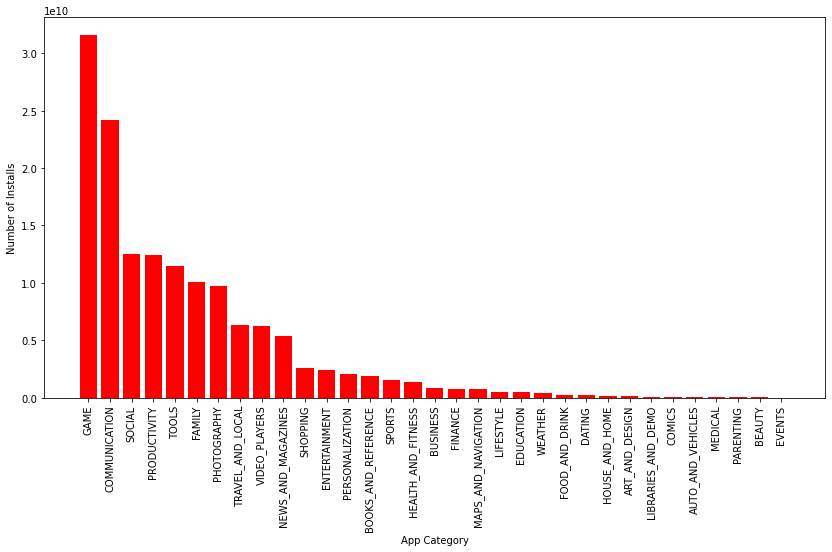

In [7]:
# Plot App Category vs Number of Installs
fig, ax = plt.subplots(figsize = (14,7))
app_category_installs = apps.groupby('Category').sum().sort_values('Installs',ascending=False)
ax.bar(app_category_installs.index,app_category_installs.Installs,color ='r')
plt.xticks(rotation=90)
plt.xlabel('App Category')
plt.ylabel('Number of Installs')
plt.show()

In [8]:
# Average Apps Rating in each Category
avg_rating = apps.groupby('Category')['Rating'].mean()
print(avg_rating)

Category
ART_AND_DESIGN         4.377049
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.347458
BUSINESS               4.102593
COMICS                 4.155172
COMMUNICATION          4.151466
DATING                 3.971698
EDUCATION              4.375969
ENTERTAINMENT          4.136036
EVENTS                 4.435556
FAMILY                 4.191264
FINANCE                4.127445
FOOD_AND_DRINK         4.164151
GAME                   4.281285
HEALTH_AND_FITNESS     4.261450
HOUSE_AND_HOME         4.164706
LIBRARIES_AND_DEMO     4.179688
LIFESTYLE              4.096066
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.182450
NEWS_AND_MAGAZINES     4.128505
PARENTING              4.300000
PERSONALIZATION        4.333117
PHOTOGRAPHY            4.182895
PRODUCTIVITY           4.201796
SHOPPING               4.251485
SOCIAL                 4.254918
SPORTS                 4.225175
TOOLS                  4.047203
TRAVEL_AND_LOCAL       4.094146

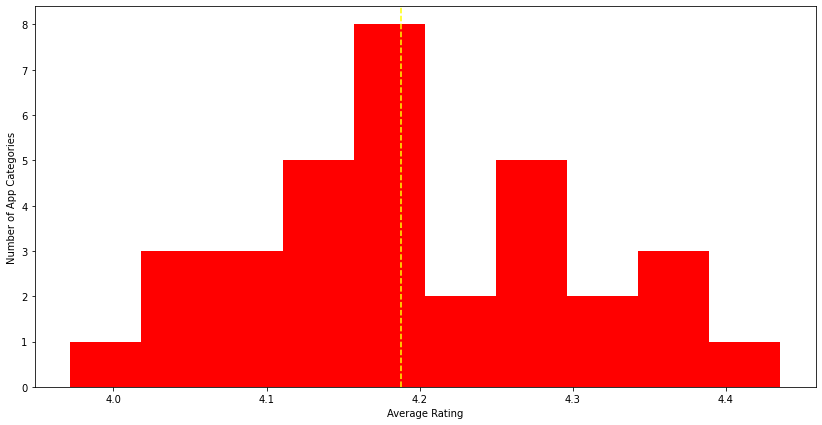

In [9]:
# Plot a histogram for Average Rating
fig, ax = plt.subplots(figsize = (14,7))
ax.hist(avg_rating,color='red')
ax.axvline(apps['Rating'].mean(),color='yellow',linestyle='--')
plt.xlabel('Average Rating')
plt.ylabel('Number of App Categories')
plt.show()

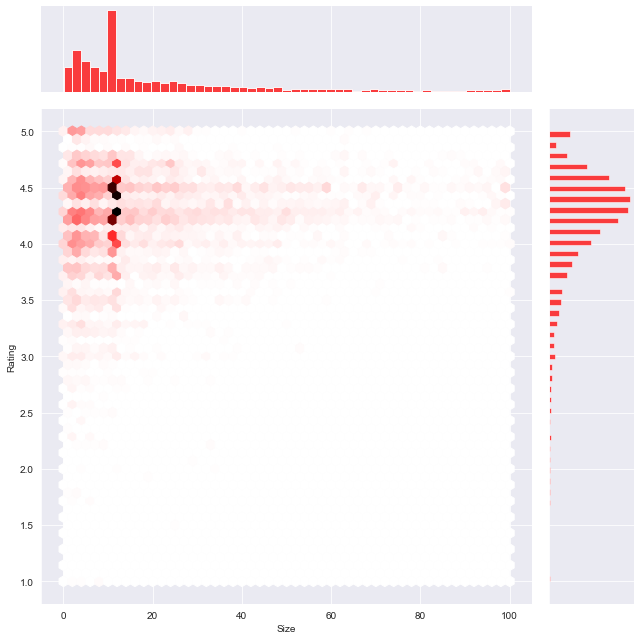

In [10]:
# Visualize the relation between Size and Ratings

%matplotlib inline
sns.set_style("darkgrid")

sns.jointplot(x = apps['Size'], y = apps['Rating'], height=9, kind='hex',color = 'r')
plt.show()

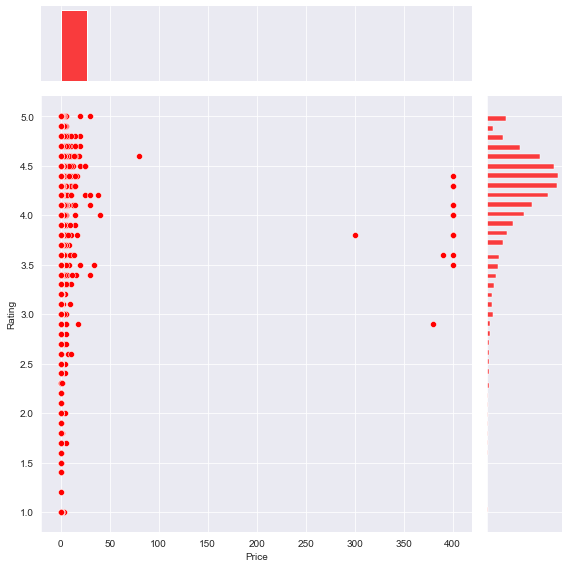

In [11]:
# Visualize the relation between Price and Rating of the App
%matplotlib inline

sns.jointplot(x = apps['Price'], y = apps['Rating'], height=8,color = 'r')
plt.show()

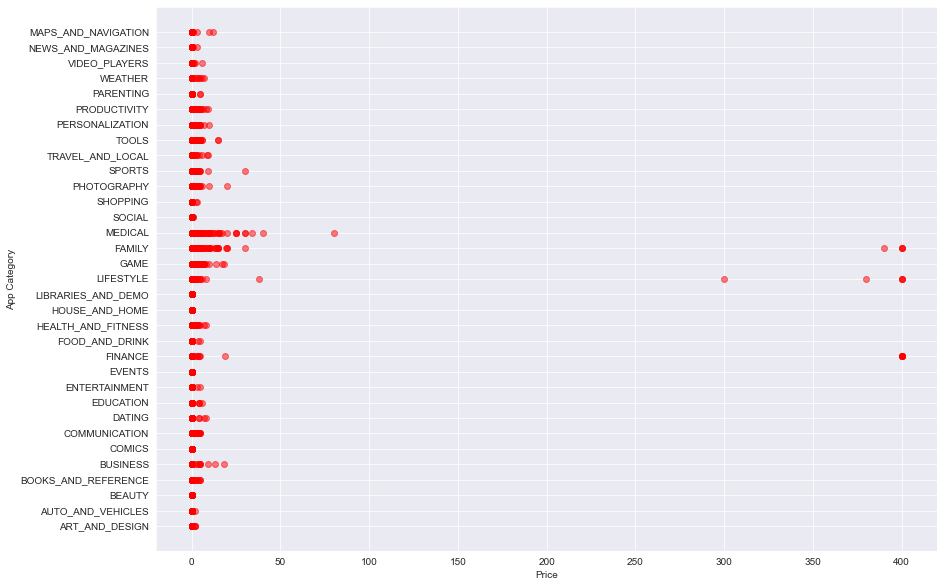

In [12]:
# Plot App Price vs App Category
%matplotlib inline
fig,ax = plt.subplots(figsize=(14,10))

plt.scatter(x=apps['Price'], y=apps['Category'], alpha=0.5,color = 'r')
plt.xlabel('Price')
plt.ylabel('App Category')
plt.show()

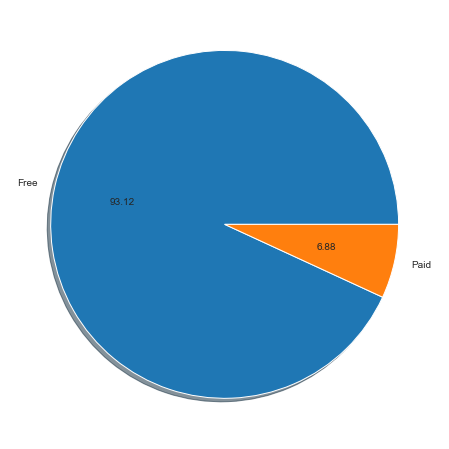

In [13]:
# Plot the popularity of Paid Apps vs Free Apps
fig,ax1 = plt.subplots(figsize=(12,8))
freevspaid = apps.groupby('Type').size()
plt.pie(freevspaid,labels=['Free','Paid'],shadow=True,autopct='%.2f')
plt.show()

## Sentiment Analysis

In [14]:
# Load and clean the User Reviews Dataset
reviews = pd.read_csv('User Reviews.csv')
reviews.dropna(inplace=True)

In [15]:
# Merge 'reviews' DataFrame with 'apps' DataFrame. We use inner join to do this operation.
mergedf = pd.merge(apps, reviews, on='App', how = 'inner')
mergedf.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [16]:
# Print Summary of the merged DataFrame
mergedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59124 entries, 0 to 59123
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     59124 non-null  object        
 1   Category                59124 non-null  object        
 2   Rating                  59124 non-null  float64       
 3   Reviews                 59124 non-null  object        
 4   Size                    59124 non-null  float64       
 5   Installs                59124 non-null  int64         
 6   Type                    59124 non-null  object        
 7   Price                   59124 non-null  float64       
 8   Content Rating          59124 non-null  object        
 9   Genres                  59124 non-null  object        
 10  Last Updated            59124 non-null  datetime64[ns]
 11  Current Ver             59124 non-null  object        
 12  Android Ver             59124 non-null  object

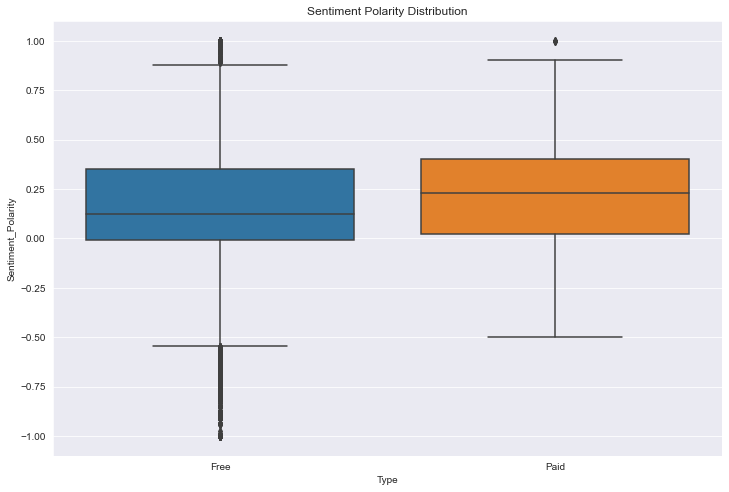

In [17]:
# Visualize the Sentiment Polarity Distribution for Free and Paid apps
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = mergedf)
ax.set_title('Sentiment Polarity Distribution')
plt.show()

Sentiment
Positive    37523
Negative    15041
Neutral      6560
dtype: int64


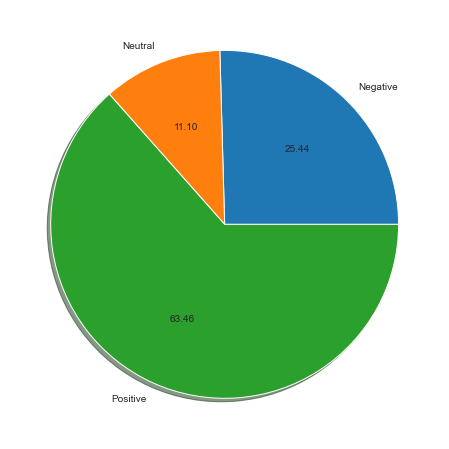

In [18]:
# Explore Composition of the total reviews
print(mergedf.value_counts('Sentiment'))

# Visualize the composition through a pie chart
fig,ax1 = plt.subplots(figsize=(12,8))
sentiments = mergedf.groupby('Sentiment').size()
plt.pie(sentiments,labels=['Negative','Neutral','Positive'],shadow=True,autopct='%.2f')
plt.show()

## Conclusion

from the above observations and visualizations, we can draw the following conclusions:

1.The most popular App Category is "Game"

2.A large number of Apps fall into "Family" Category i.e., this is the category with highest number of subsequent apps

3.The total average rating of Play Store Apps is 4.18

4.The App Categories with least and highest average ratings are "Dating" and "Events" respectively.

5.Free apps are highly popular compared to Paid apps.

6.Most apps receive Positive reviews i.e. about 63.5%. Free apps might have a broader range of reviews than Paid apps but the median of Sentiment Polarity is higher in Paid apps.